In [58]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Load Audio Files
prefix = "../songs/"
cfm_file = prefix + "cfm.wav"
fancy_file  = prefix + "fancy.wav"
pw_file = prefix + "pw.wav"

cfm, _ = librosa.load(cfm_file, duration=30)
fancy, _ = librosa.load(fancy_file, duration=30)
pw, _ = librosa.load(pw_file, duration=30)

In [73]:
# Extract RMSE with librosa

FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_cfm = librosa.feature.rms(cfm, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_fancy = librosa.feature.rms(fancy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_pw = librosa.feature.rms(pw, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [61]:
rms_fancy.shape

(1292,)

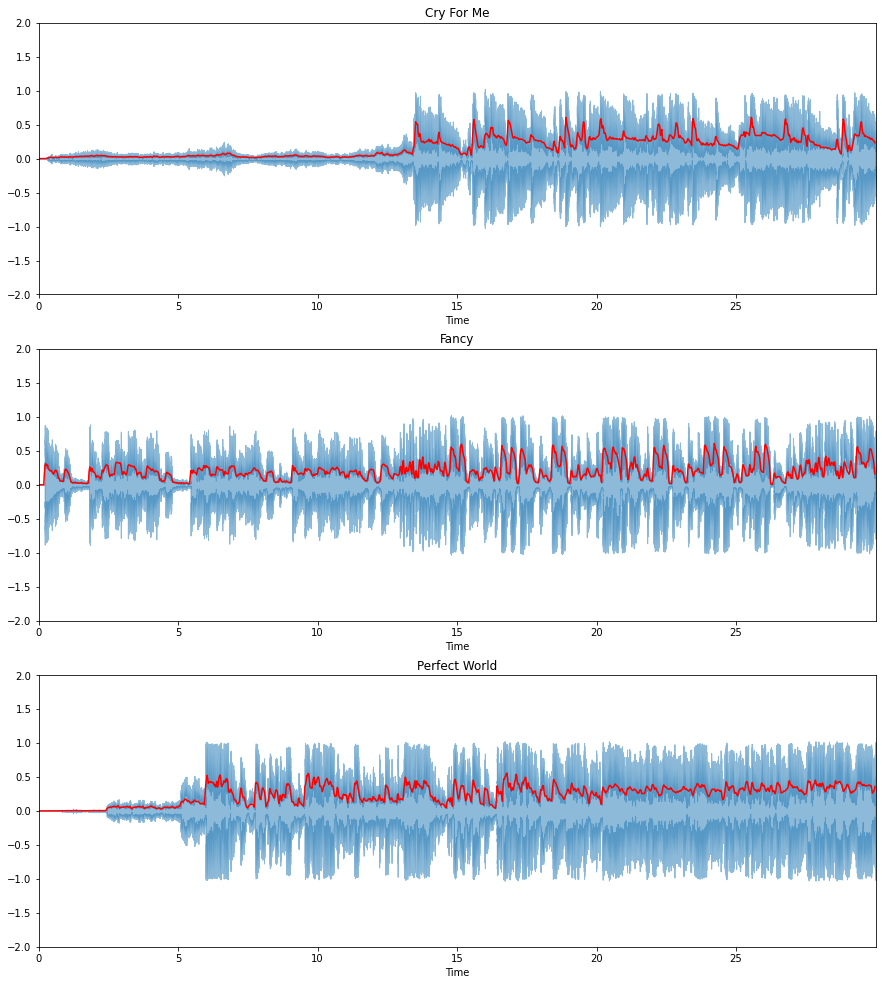

In [62]:
# Plot the RMSE for all the music pieces

frames_cfm = range(0, rms_cfm.size)
t_cfm = librosa.frames_to_time(frames_cfm, hop_length=HOP_LENGTH)

frames_fancy = range(0, rms_fancy.size)
t_fancy = librosa.frames_to_time(frames_fancy, hop_length=HOP_LENGTH)

frames_pw = range(0, rms_pw.size)
t_pw = librosa.frames_to_time(frames_pw, hop_length=HOP_LENGTH)


plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(cfm, alpha=0.5)
plt.plot(t_cfm, rms_cfm, color="r")
plt.title("Cry For Me")
plt.ylim((-2,2))

plt.subplot(3,1,2)
librosa.display.waveplot(fancy, alpha=0.5)
plt.plot(t_fancy, rms_fancy, color="r")
plt.title("Fancy")
plt.ylim((-2,2))


plt.subplot(3,1,3)
librosa.display.waveplot(pw, alpha=0.5)
plt.plot(t_pw, rms_pw, color="r")
plt.title("Perfect World")
plt.ylim((-2,2))

plt.show()

In [63]:
def rms(signal, frame_length, hop_length):
    rms_frames = []
    
    for i in range(0, len(signal), hop_length):
        rms_frames.append(np.sqrt(np.sum(signal[i:i+frame_length]**2)/frame_length))
    return np.array(rms_frames)

In [64]:
rms2_cfm = rms(cfm, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms2_fancy = rms(fancy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms2_pw = rms(pw, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)

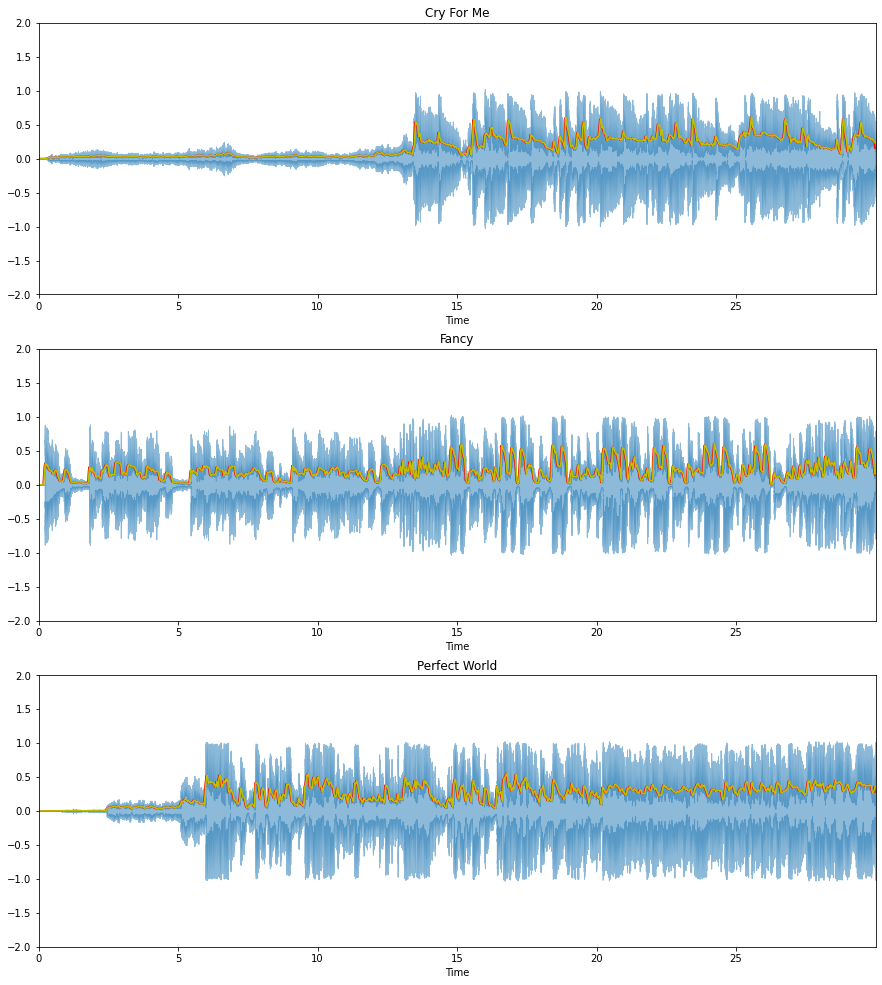

In [65]:
# Plot the RMSE for all the music pieces

frames_cfm = range(0, rms2_cfm.size)
t2_cfm = librosa.frames_to_time(frames_cfm, hop_length=HOP_LENGTH)

frames_fancy = range(0, rms2_fancy.size)
t2_fancy = librosa.frames_to_time(frames_fancy, hop_length=HOP_LENGTH)

frames_pw = range(0, rms2_pw.size)
t2_pw = librosa.frames_to_time(frames_pw, hop_length=HOP_LENGTH)


plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(cfm, alpha=0.5)

plt.plot(t2_cfm, rms2_cfm, color="r")
plt.plot(t_cfm, rms_cfm, color="y")
plt.title("Cry For Me")
plt.ylim((-2,2))

plt.subplot(3,1,2)
librosa.display.waveplot(fancy, alpha=0.5)
plt.plot(t2_fancy, rms2_fancy, color="r")
plt.plot(t_fancy, rms_fancy, color="y")
plt.title("Fancy")
plt.ylim((-2,2))


plt.subplot(3,1,3)
librosa.display.waveplot(pw, alpha=0.5)
plt.plot(t2_pw, rms2_pw, color="r")
plt.plot(t_pw, rms_pw, color="y")
plt.title("Perfect World")
plt.ylim((-2,2))

plt.show()

In [66]:
# Zero crossing Rate

zcr_cfm = librosa.feature.zero_crossing_rate(cfm, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_fancy = librosa.feature.zero_crossing_rate(fancy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_pw = librosa.feature.zero_crossing_rate(pw, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]


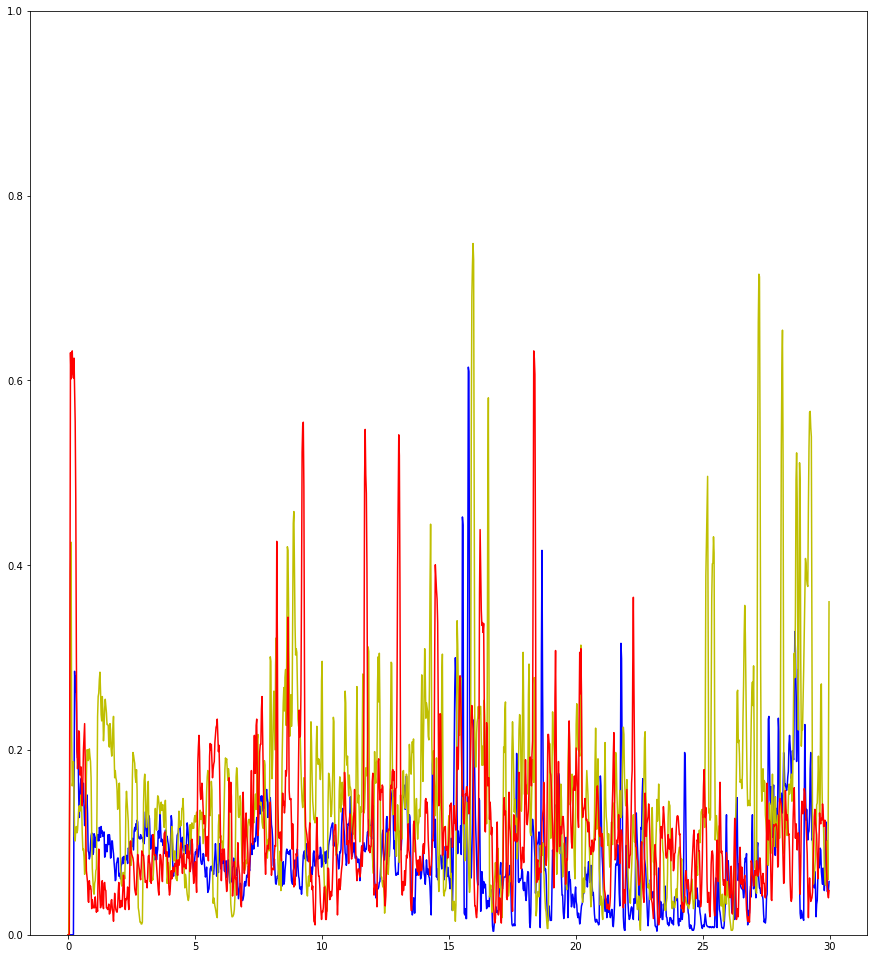

In [68]:
# Visualise the Zero Crossing Rate
plt.figure(figsize=(15,17))
plt.plot(t_cfm, zcr_cfm , color="b")
plt.plot(t_fancy, zcr_fancy, color="y")
plt.plot(t_pw, zcr_pw, color="r")
plt.ylim((0,1))
plt.show()


In [69]:
# Noise vs Voice

In [70]:
voice_file = prefix + "voice.wav"
noise_file = prefix + "noise.wav"

In [71]:
# load audio files
voice, _ = librosa.load(voice_file, duration=15)
noise, _ = librosa.load(noise_file, duration=15)

In [75]:
# get ZCR
zcr_voice = librosa.feature.zero_crossing_rate(voice, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(noise, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [76]:
frames = range(len(zcr_voice))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

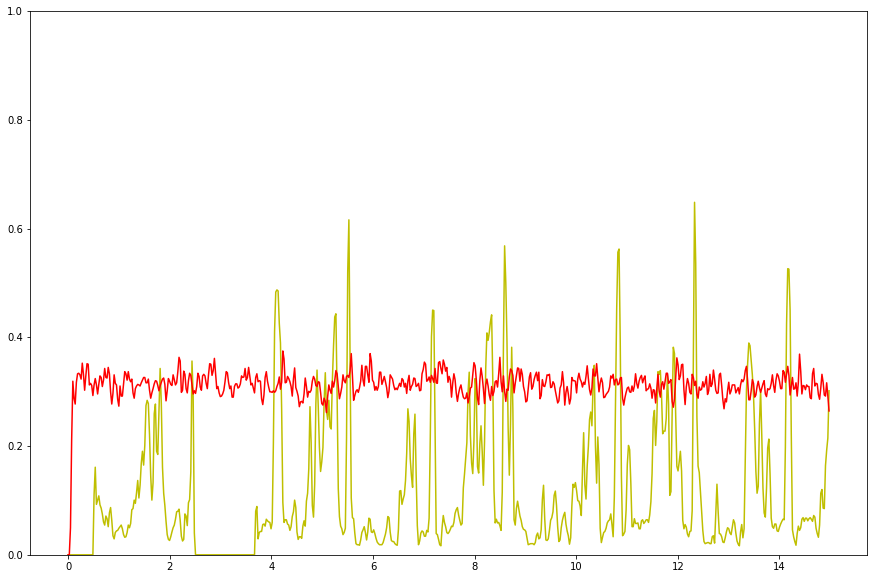

In [77]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_voice, color="y")
plt.plot(t, zcr_noise, color="r")
plt.ylim(0, 1)
plt.show()